In [ ]:
from fastbook import *

In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [2]:
path

Path('C:/Users/Shwetansh Singh/.fastai/data/oxford-iiit-pet')

the below code makes it so whenever we print the path inside our folder of choice (for example when using .ls()), the complete path from C: onwards is not printed. It is replaced by Path

In [3]:
Path.BASE_PATH = path

In [4]:
path.ls()
# (path/"annotations").ls()

(#2) [Path('annotations'),Path('images')]

In [5]:
(path/"images").ls()

(#7395) [Path('images/Abyssinian_1.jpg'),Path('images/Abyssinian_10.jpg'),Path('images/Abyssinian_100.jpg'),Path('images/Abyssinian_100.mat'),Path('images/Abyssinian_101.jpg'),Path('images/Abyssinian_101.mat'),Path('images/Abyssinian_102.jpg'),Path('images/Abyssinian_102.mat'),Path('images/Abyssinian_103.jpg'),Path('images/Abyssinian_104.jpg')...]

In [11]:
fname = (path/"images").ls()[0]
type(fname),type(fname.name)

(pathlib.WindowsPath, str)

In [8]:
re.findall(r'(.+)_\d+.jpg$',fname.name)

['Abyssinian']

In [22]:
# doc(RandomSplitter)
# doc(DataBlock)
doc(DataLoaders)

DataLoaders(*loaders, path: 'str | Path' = '.', device=None)
Basic wrapper around several `DataLoader`s.

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [13]:
pets = DataBlock(blocks=(ImageBlock,CategoryBlock),
                 get_items=get_image_files,
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'),'name'),
                 splitter=RandomSplitter(seed=21),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224,min_scale=0.75))
dls = pets.dataloaders(path/"images")

In [17]:
pets.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      C:\Users\Shwetansh Singh\.fastai\data\oxford-iiit-pet\images\Abyssinian_107.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x448
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      C:\Users\Shwetansh Singh\.fastai\data\oxford-iiit-pet\images\Abyssinian_107.jpg
    applying partial gives
      Abyssinian
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=500x448, TensorCategory(0))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 

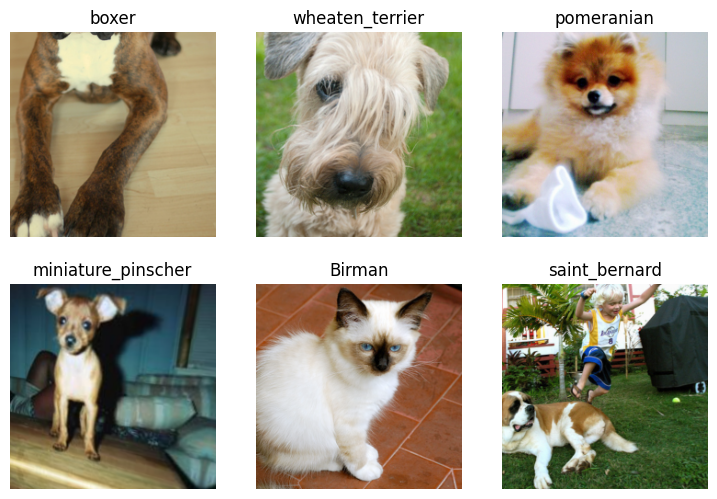

In [15]:
dls.show_batch(nrows=2,ncols=3)

In [18]:
x,y = dls.one_batch()

In [19]:
y

TensorCategory([20,  9, 26,  3, 18, 27, 22,  8, 32,  0,  2, 17, 20, 36, 29,  6,
                26, 23, 14, 11, 17, 36, 15, 36,  6, 25, 11, 15,  7,  8, 36,  6,
                36, 35, 29, 22,  2, 35, 17, 12, 22, 30, 33,  2, 12, 28,  3,  4,
                21,  5,  2, 16,  0, 19, 29, 12, 12,  0,  8, 24, 28,  4, 21, 18],
               device='cuda:0')

64 values for batch size=64. Each entry is a single integer between 0 and 36, representing 37 possible breeds.

creating a basic model

In [23]:
learn = vision_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(2)

c:\Users\Shwetansh Singh\miniconda3\envs\pipsetup\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Shwetansh Singh\miniconda3\envs\pipsetup\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.550987,0.323506,0.106225,01:25


epoch,train_loss,valid_loss,error_rate,time


In [ ]:
torch.random.manual_seed(42)